In [48]:
import pandas as pd

Variables dummies

In [49]:
data = {'Nombre': ['Ana', 'Juan', 'Diana', 'Pedro'],
        'Ciudad': ['Madrid', 'Barcelona', 'Madrid', 'Valencia']}

df = pd.DataFrame(data)

print(df)

  Nombre     Ciudad
0    Ana     Madrid
1   Juan  Barcelona
2  Diana     Madrid
3  Pedro   Valencia


In [50]:
dummies = pd.get_dummies(df['Ciudad'])
print(dummies)

   Barcelona  Madrid  Valencia
0          0       1         0
1          1       0         0
2          0       1         0
3          0       0         1


In [51]:
dummies_2 = pd.get_dummies(df['Nombre'])
print(dummies_2)

   Ana  Diana  Juan  Pedro
0    1      0     0      0
1    0      0     1      0
2    0      1     0      0
3    0      0     0      1


One Hot Encoder

In [52]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

words = np.array(['Madrid', 'Barcelona', 'Madrid','Valencia']).reshape(-1,1)

encoder = OneHotEncoder(sparse_output=False)
words_encoded = encoder.fit_transform(words)

print(words_encoded)


[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Bag of Words

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

documents = ['Hola mundo', 'Adiós mundo', 'Hola hola']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

print(X.toarray())

[[0 1 1]
 [1 0 1]
 [0 2 0]]


TF-IDF

In [54]:
# Se usaba para reconocimiento de texto
from sklearn.feature_extraction.text import TfidfVectorizer

documents = ['Hola mundo', 'Adiós mundo', 'Hola hola']

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)

print(X.toarray())

[[0.         0.70710678 0.70710678]
 [0.79596054 0.         0.60534851]
 [0.         1.         0.        ]]


Word Embeddings (Embeddings de palabras)

In [55]:
from gensim.models import Word2Vec
sentences = [['hola','mundo'], ['adios', 'mundo']]

model = Word2Vec(sentences,vector_size=2,window=5,min_count=1,workers=4)

vector = model.wv['hola']

print(vector)

[-0.4651475  -0.35584044]


# Introducción a aprendizaje supervisado y no supervisado

Modelo ADALINE (1960) - Es una neurona


El vias permite el desplazamiento del origen para poder hacer otras divisiones. El desplazamiento del origen permite mover la línea de decisión o el hiperplano de clasificación/regresión.
Esto es útil para ajustar la separación entre las clases o para adaptar la regresión a los datos.

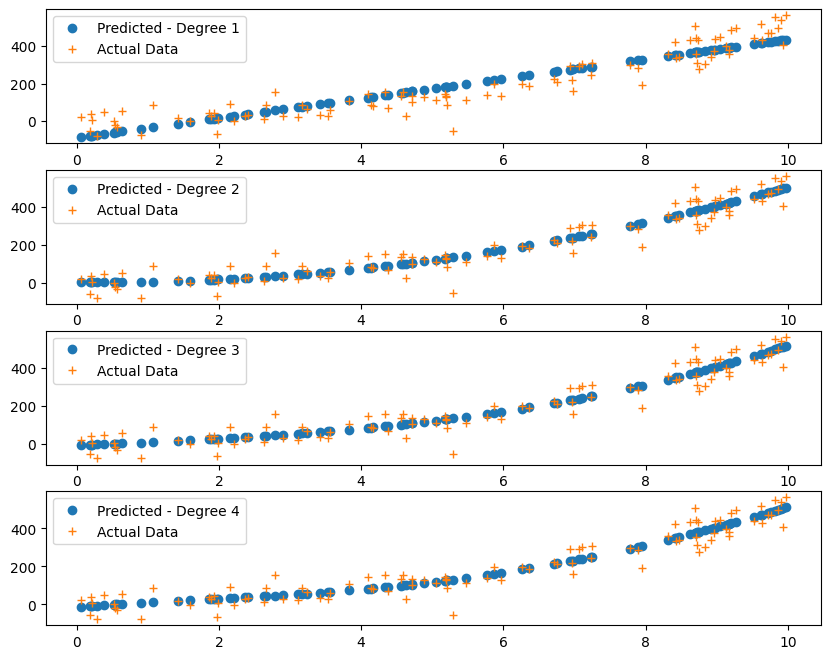

In [56]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
X = np.random.rand(m,1)*10 # Valores de X entre 0 y 10
Y = 5*X**2 + np.random.randn(m,1)*50 # Funcion cuadratica de X con ruido

grado = 4

Xa = np.ones((m,1))  #Tiene al vias

J = [] #Lista vacia para almacenar lo errores

plt.figure(figsize=(10,8))

for i in range(1, grado+1):
  Xa=np.hstack((Xa, X**i))

  W_mc = np.linalg.inv(Xa.T @ Xa) @ Xa.T @ Y
  Yg_mc = Xa @ W_mc

  E = Y-Yg_mc

  J_cost = (E.T @ E) / (2*m)
  J.append(J_cost.item())

# Graficar X, Yg_mc y X, Y
  plt.subplot(grado, 1, i)
  plt.plot(X, Yg_mc, "o", label='Predicted - Degree ' + str(i))
  plt.plot(X, Y, "+", label='Actual Data')
  plt.legend()


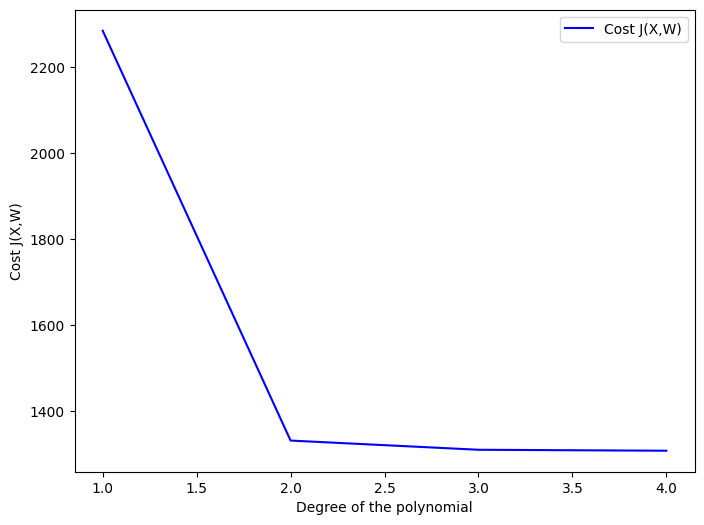

array([[-13.0418902 ],
       [ 26.80059096],
       [ -4.92553548],
       [  1.16087137],
       [ -0.0409493 ]])

In [57]:
# Graficar la función de costo J
plt.figure(figsize=(8, 6))
plt.plot(range(1, grado + 1), J, 'b', label='Cost J(X,W)')
plt.xlabel('Degree of the polynomial')
plt.ylabel('Cost J(X,W)')
plt.legend()
plt.show()

# Mostrar los pesos del modelo para el último grado
W_mc